# Environment Setup

In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
# wd.get("https://www.webite-url.com")

     |████████████████████████████████| 911kB 2.7MB/s 
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [801 B]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://ppa.launchpad.ne

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
pip install bs4

In [ ]:
# posts[0].find("a", { "class":"result-image gallery"})['data-ids'].split(',')[0].split(':')[1]

In [ ]:
# # print(posts[0])
# ["https://images.craigslist.org/{}_300x300.jpg".format(i[2:]) for i in posts[0].find("a", { "class":"result-image gallery"})['data-ids'].split(',')]

In [ ]:
# response.url

# Web scrap from craiglist

I only scrapped 5 pages, which have 600 items in total. These items may not be unique so I then dropped duplicates.

In [ ]:
from requests import get

#get the first page of the east bay housing prices
# response = get('https://sfbay.craigslist.org/search/eby/apa?hasPic=1&availabilityMode=0') #get rid of those lame-o's that post a housing option without a pic using their filter
response = get('https://sfbay.craigslist.org/search/eby/sss?query=furniture&hasPic=1&availabilityMode=0')
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')


from time import sleep
import re
from random import randint #avoid throttling by not sending too many requests one after the other
from warnings import warn
from time import time
from IPython.core.display import clear_output
import numpy as np
from bs4.element import Tag
# find the total number of posts to find the limit of the pagination
results_num = html_soup.find('div', class_= 'search-legend')
results_total = int(results_num.find('span', class_='totalcount').text) #pulled the total count of posts as the upper bound of the pages array

#each page has 119 posts so each new page is defined as follows: s=120, s=240, s=360, and so on. So we need to step in size 120 in the np.arange function
# pages = np.arange(0, results_total+1, 120)
k = 5
pages = np.arange(0, 120*k,120) 

iterations = 0

post_timing = []
post_hoods = []
post_title_texts = []
bedroom_counts = []
sqfts = []
post_links = []
post_prices = []
post_img = []

for page in pages:
    
    #get request
    response = get("https://sfbay.craigslist.org/search/eby/sss?" 
                   +'query=furniture'
                   + "&hasPic=1"
                   + "&availabilityMode=0"
                   + "&s=" #the parameter for defining the page number 
                   + str(page)) #the page number in the pages array from earlier)
    print(response.url)

    sleep(randint(1,5))
     
    #throw warning for status codes that are not 200
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))
        
    #define the html text
    page_html = BeautifulSoup(response.text, 'html.parser')
    
    #define the posts
    posts = page_html.find_all('li', class_= 'result-row')
    
    #extract data item-wise
    for post in posts:

        if post.find('span', class_ = 'result-hood') is not None:

            #posting date
            #grab the datetime element 0 for date and 1 for time
            post_datetime = post.find('time', class_= 'result-date')['datetime']
            post_timing.append(post_datetime)

            #neighborhoods
            post_hood = post.find('span', class_= 'result-hood').text
            post_hoods.append(post_hood)

            #title text
            post_title = post.find('a', class_='result-title hdrlnk')
            post_title_text = post_title.text
            post_title_texts.append(post_title_text)

            #post link
            post_link = post_title['href']
            post_links.append(post_link)
            
            #removes the \n whitespace from each side, removes the currency symbol, and turns it into an int
            post_price = int(post.a.text.strip().replace("$", "")) 
            post_prices.append(post_price)

            image_id = post.find("a", { "class":"result-image gallery"})['data-ids'].split(',')[0].split(':')[1]
            post_img.append("https://images.craigslist.org/{}_300x300.jpg".format(image_id))
            
            if post.find('span', class_ = 'housing') is not None:
                
                #if the first element is accidentally square footage
                if 'ft2' in post.find('span', class_ = 'housing').text.split()[0]:
                    
                    #make bedroom nan
                    bedroom_count = np.nan
                    bedroom_counts.append(bedroom_count)
                    
                    #make sqft the first element
                    sqft = int(post.find('span', class_ = 'housing').text.split()[0][:-3])
                    sqfts.append(sqft)
                    
                #if the length of the housing details element is more than 2
                elif len(post.find('span', class_ = 'housing').text.split()) > 2:
                    
                    #therefore element 0 will be bedroom count
                    bedroom_count = post.find('span', class_ = 'housing').text.replace("br", "").split()[0]
                    bedroom_counts.append(bedroom_count)
                    
                    #and sqft will be number 3, so set these here and append
                    sqft = int(post.find('span', class_ = 'housing').text.split()[2][:-3])
                    sqfts.append(sqft)
                    
                #if there is num bedrooms but no sqft
                elif len(post.find('span', class_ = 'housing').text.split()) == 2:
                    
                    #therefore element 0 will be bedroom count
                    bedroom_count = post.find('span', class_ = 'housing').text.replace("br", "").split()[0]
                    bedroom_counts.append(bedroom_count)
                    
                    #and sqft will be number 3, so set these here and append
                    sqft = np.nan
                    sqfts.append(sqft)                    
                
                else:
                    bedroom_count = np.nan
                    bedroom_counts.append(bedroom_count)
                
                    sqft = np.nan
                    sqfts.append(sqft)
                
            #if none of those conditions catch, make bedroom nan, this won't be needed    
            else:
                bedroom_count = np.nan
                bedroom_counts.append(bedroom_count)
                
                sqft = np.nan
                sqfts.append(sqft)
            #    bedroom_counts.append(bedroom_count)
                
            #    sqft = np.nan
            #    sqfts.append(sqft)
                
    iterations += 1
    print("Page " + str(iterations) + " scraped successfully!")

print("\n")

print("Scrape complete!")

https://sfbay.craigslist.org/search/eby/sss?query=furniture&hasPic=1&availabilityMode=0&s=0
Page 1 scraped successfully!
https://sfbay.craigslist.org/search/eby/sss?query=furniture&hasPic=1&availabilityMode=0&s=120
Page 2 scraped successfully!
https://sfbay.craigslist.org/search/eby/sss?query=furniture&hasPic=1&availabilityMode=0&s=240
Page 3 scraped successfully!
https://sfbay.craigslist.org/search/eby/sss?query=furniture&hasPic=1&availabilityMode=0&s=360
Page 4 scraped successfully!
https://sfbay.craigslist.org/search/eby/sss?query=furniture&hasPic=1&availabilityMode=0&s=480
Page 5 scraped successfully!


Scrape complete!


# Data preparation

In [ ]:
import pandas as pd

furniture_df = pd.DataFrame({'posted': post_timing,
                       'neighborhood': post_hoods,
                       'post title': post_title_texts,
                        'URL': post_links,
                       'price': post_prices,
                        'img_url': post_img})
print(furniture_df.info())
furniture_df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   posted        572 non-null    object
 1   neighborhood  572 non-null    object
 2   post title    572 non-null    object
 3   URL           572 non-null    object
 4   price         572 non-null    int64 
 5   img_url       572 non-null    object
dtypes: int64(1), object(5)
memory usage: 26.9+ KB
None


,posted,neighborhood,post title,URL,price,img_url
0,2020-06-21 13:10,(oakland rockridge / claremont),Light Fixtures (ceiling and table lights),https://sfbay.craigslist.org/eby/fuo/d/oakland...,100,https://images.craigslist.org/00o0o_g4kQl9LfY8...
1,2020-06-21 13:11,(oakland rockridge / claremont),Pair of Barcelona style leather chairs,https://sfbay.craigslist.org/eby/fuo/d/oakland...,600,https://images.craigslist.org/00505_7ucMALkGHT...
2,2020-06-21 13:11,(oakland rockridge / claremont),Roche Bobois leather chair,https://sfbay.craigslist.org/eby/fuo/d/oakland...,400,https://images.craigslist.org/00F0F_jY1kH784Sy...
3,2020-06-21 13:12,(oakland rockridge / claremont),Danish modern Bent Karlby Osterport Pendant Light,https://sfbay.craigslist.org/eby/fuo/d/oakland...,500,https://images.craigslist.org/00o0o_ibAlHH1LNf...
4,2020-06-21 13:12,(brentwood / oakley),STILL AVAILABLE PRICE DROP!! VINTAGE PROJECTIO...,https://sfbay.craigslist.org/eby/fuo/d/discove...,85,https://images.craigslist.org/00s0s_ePR7WkWsdF...
...,...,...,...,...,...,...
95,2020-06-21 12:24,(oakland west),Luxurious bedroom furniture set ($350 or best ...,https://sfbay.craigslist.org/eby/fuo/d/oakland...,350,https://images.craigslist.org/00Q0Q_fU5fIiM3an...
96,2020-06-21 12:24,(oakland west),Beautiful tufted ottoman,https://sfbay.craigslist.org/eby/fuo/d/oakland...,100,https://images.craigslist.org/00M0M_awRtniivFH...
97,2020-06-21 12:24,(oakland west),TV Stand - perfect condition (IKEA),https://sfbay.craigslist.org/eby/fuo/d/oakland...,25,https://images.craigslist.org/00O0O_ghDiwzvYYh...
98,2020-06-21 12:24,(oakland west),Beautiful Japanese room divider 7',https://sfbay.craigslist.org/eby/fuo/d/oakland...,150,https://images.craigslist.org/00I0I_bMUVQeh7HL...


In [ ]:
len(furniture_df.img_url.unique())

563

In [ ]:
furniture_df = furniture_df.drop_duplicates('img_url')
furniture_df = furniture_df[furniture_df['price']!=0]

Dataset size

In [ ]:
len(furniture_df)

529

In [ ]:
!rm -r data

rm: cannot remove 'data': No such file or directory


In [ ]:
!mkdir data
!mkdir data/train
!mkdir data/val
!mkdir data/test

In [ ]:
# import pandas as pd
# furniture_df = pd.read_csv('/content/drive/My Drive/furniture.csv')

(array([386.,  96.,  25.,  11.,   2.,   1.,   4.,   0.,   0.,   4.]),
 array([1.0000e+00, 3.0090e+02, 6.0080e+02, 9.0070e+02, 1.2006e+03,
        1.5005e+03, 1.8004e+03, 2.1003e+03, 2.4002e+03, 2.7001e+03,
        3.0000e+03]),
 <a list of 10 Patch objects>)

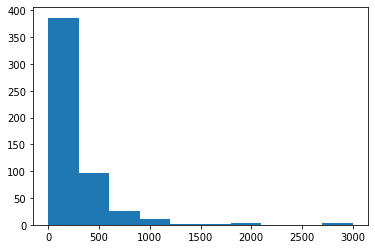

In [ ]:
import matplotlib.pyplot as plt

x = []
for i, row in furniture_df.iterrows():
    x.append(row.price)
plt.hist(x, bins= 10)

I only select the items that its price is less than 2000.

In [ ]:
from sklearn.model_selection import train_test_split
furniture_df =furniture_df[furniture_df['price'] <=2000]
train, test = train_test_split(furniture_df, test_size=0.2,random_state = 42)
train, val = train_test_split(train, test_size = 0.125, random_state = 42)

In [ ]:
furniture_df.to_csv('/content/drive/My Drive/furniture.csv')

In [ ]:
train = train.reset_index()
val = val.reset_index()
test = test.reset_index()

normalize price feature because the range of price is from 0 to 2000.

In [ ]:
import sklearn
from sklearn.preprocessing import normalize
X = np.array(train['price']).reshape(1, -1)
normalizer = sklearn.preprocessing.Normalizer().fit(X)
train['price'] = normalizer.transform(X)[0]

X = np.array(val['price']).reshape(1, -1)
normalizer = sklearn.preprocessing.Normalizer().fit(X)
val['price'] = normalizer.transform(X)[0]

X = np.array(test['price']).reshape(1, -1)
normalizer = sklearn.preprocessing.Normalizer().fit(X)
test['price'] = normalizer.transform(X)[0]

In [ ]:
import tqdm 
from tqdm import tqdm_notebook

# Download image data

In [ ]:
%cd data/train
import urllib.request
import os
for i, row in tqdm_notebook(train.iterrows()):
  img_url = row.img_url
  img_name = os.path.basename(img_url)
  local_filename, headers = urllib.request.urlretrieve(img_url,img_name)
  # print(local_filename, headers)


/content/data/train


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [ ]:
%cd ..

/content/data


In [ ]:
%cd val
for i, row in val.iterrows():
  img_url = row.img_url
  img_name = os.path.basename(img_url)
  urllib.request.urlretrieve(img_url,img_name)

/content/data/val


In [ ]:
%cd ..
%cd test
for i, row in test.iterrows():
  img_url = row.img_url
  img_name = os.path.basename(img_url)
  urllib.request.urlretrieve(img_url,img_name)

/content/data
/content/data/test


# Transfer Learning Setup

In [ ]:
# TODO: INSERT CODE HERE
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
# from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import random
import numpy as np
import matplotlib
import pandas as pd
import dill
import skimage
from skimage import io
import torchvision
import torch.utils.data as data
from torchvision import datasets, models, transforms
from torchvision.transforms import ToTensor
import os

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
input_size = 224
input_transforms = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((input_size, input_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])

In [ ]:
%cd ..
%cd ..

/content/data
/content


In [ ]:
# %cd ~
# %cd /content
# x_train, x_val, x_test = [], [], []
# y_train, y_val, y_test = [], [], []
# for i, row in train.iterrows():
#   # print(row.img_url.split('//')[1].split('/')[1])
#   x_train.append(torch.tensor(io.imread(os.path.join('data/train/room', row.img_url.split('//')[1].split('/')[1]))))
#   y_train.append(torch.tensor(row.price))
# for i, row in val.iterrows():
#   # print(row.img_url.split('//')[1].split('/')[1])
#   x_val.append(torch.tensor(io.imread(os.path.join('data/val/room', row.img_url.split('//')[1].split('/')[1]))))
#   y_val.append(torch.tensor(row.price))
# for i, row in test.iterrows():
#   # print(row.img_url.split('//')[1].split('/')[1])
#   x_test.append(torch.tensor(io.imread(os.path.join('data/test/room', row.img_url.split('//')[1].split('/')[1]))))
#   y_test.append(torch.tensor(row.price))

In [ ]:
from torch.utils.data import Dataset, DataLoader

## Define customized PyTorch dataset structure

In [ ]:
class FurnitureDataset(Dataset):

    def __init__(self, dataset, data_type, transform):

        self.dataset = dataset
        self.transform = transform
        self.data_type = data_type

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):

        row = self.dataset.loc[idx]
        image = io.imread(os.path.join('data/'+ self.data_type, row.img_url.split('//')[1].split('/')[1]))
        price = row.price
        

        image = self.transform(image)

        return (image, price)

In [ ]:
train_dataset = FurnitureDataset(train, 'train', input_transforms)
val_dataset = FurnitureDataset(val, 'val', input_transforms)
test_dataset = FurnitureDataset(test, 'test', input_transforms)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset,  batch_size=8,shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset,  batch_size=8,shuffle=True, num_workers=4)

## import resnet pre-trained model

In [ ]:
import torchvision.models as models
resnet = models.resnet18(pretrained=True)
# resnet152 = models.resnet152(pretrained=True)
resnet = resnet.to(device)
print(resnet)


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
 

## freeze the backpropagation except the last layer to train faster

In [ ]:
def set_parameter_requires_grad(model, feature_extracting):
  if feature_extracting:
    for param in model.parameters():
      param.requires_grad = False

set_parameter_requires_grad(resnet, feature_extracting = True)

In [ ]:
num_classes = 1

last_input = resnet.fc.in_features
resnet.fc = nn.Linear(last_input, num_classes)

print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Model setup

In [ ]:
pretrained_model = resnet.to(device)

learning_rate = 0.0001

criterion = nn.MSELoss() 
optimizer = torch.optim.Adam(pretrained_model.parameters(), lr = learning_rate, weight_decay=1e-3)

num_epochs = 10

# from torch.utils.tensorboard import SummaryWriter

In [ ]:
len(train_loader)

46

# Training

In [ ]:
step = 0

pretrained_model.train()

# Training loop
for epoch in range(0,num_epochs):
  correct = 0
  total = 0
  total_loss = 0
  for i, (img, labels) in enumerate(train_loader):
    img = img.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()

    output = pretrained_model(img)
    # print(output)

    loss = criterion(output, labels.type_as(output))
    
    loss.backward()
    
    optimizer.step()

    # Calculate accuracy and total loss
    total_loss += loss.item()
    # print(loss.item())
    total+=1

    # Tensorboard logging
    # if ((step % 10) == 0):
    #   writer.add_scalar("Loss/train", total_loss/total, step)
    #   writer.add_scalar("Acc/train", correct/total, step)
    info = { 'Loss': loss.item()}
    # for tag, value in info.items():
    #       logger.add_scalar(tag, value, step+1)

    step = step+1
    if i % 10 ==0:
      print("--- Step: %s Loss: %s" %(i ,total_loss/total))
      # print(output)
  
  print("*******************************************************************")
  print("Epoch: %s Loss: %s"%(epoch, total_loss/total))
  print("*******************************************************************")

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


--- Step: 0 Loss: 0.689237117767334
--- Step: 10 Loss: 0.398796561089429
--- Step: 20 Loss: 0.3026107546119463
--- Step: 30 Loss: 0.26300137465999973
--- Step: 40 Loss: 0.24665747528396
*******************************************************************
Epoch: 0 Loss: 0.23342230689266455
*******************************************************************


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


--- Step: 0 Loss: 0.09508407860994339
--- Step: 10 Loss: 0.18046158687634903
--- Step: 20 Loss: 0.1668096502267179
--- Step: 30 Loss: 0.15024322884217386
--- Step: 40 Loss: 0.15136399065575948
*******************************************************************
Epoch: 1 Loss: 0.15354288077872733
*******************************************************************
--- Step: 0 Loss: 0.16840969026088715
--- Step: 10 Loss: 0.13230211626399646
--- Step: 20 Loss: 0.12957317736886798
--- Step: 30 Loss: 0.13886621414173034
--- Step: 40 Loss: 0.13884920199833264
*******************************************************************
Epoch: 2 Loss: 0.13357594819820445
*******************************************************************
--- Step: 0 Loss: 0.20614445209503174
--- Step: 10 Loss: 0.10534170913425359
--- Step: 20 Loss: 0.1216555026670297
--- Step: 30 Loss: 0.11849037714062198
--- Step: 40 Loss: 0.12026454126689493
*******************************************************************
Epoch: 3 L

# Test

In [ ]:
def test_model_resnet(test_dataloader, net):
  # TODO: Insert your code here
  ans = []
  with torch.no_grad(): 
    correct  = 0
    total  = 0
    total_loss = 0
    for images,labels in test_dataloader:
      images = images.to(device) #why need one more dimension -1, because is the batch
      labels = labels.to(device)
      outputs = net(images)
      loss = criterion(outputs, labels.type_as(output))
      total_loss += loss.item()
      total+=1
      
    print('total loss: ', total_loss/total)
  return total_loss/total

In [ ]:
test_model_resnet(test_loader, pretrained_model)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


total loss:  0.04997596833189683


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0.04997596833189683